### Load the data from the experiments

In [1]:
from s3ts.analysis import load_folder
from pathlib import Path

df = load_folder(Path("storage/synced"))
df.head()

/home/raul/code/s3ts/s3ts_env/lib/python3.11/site-packages/sktime/__init__.py:45: PackageDeprecationWarning: 
The sktime PyPI package is deprecated.
The sktime project split into two projects.

To find out how to install the new packages, please go to:

* https://github.com/aeon-toolkit/aeon
* https://github.com/sktime/sktime

Here is what you can do when installing sktime via pip (e.g. using `pip install ...` or a requirement file like `requirements.txt`, `setup.py`, `setup.cfg`):

* continue using the package without receiving any updates (ignoring the deprecation warning or avoiding it by pinning the version: `sktime==0.18.0`),
* replace sktime with one of the new projects,
* if the sktime package is used by one of your dependencies, it would be great if you take some time to track which package uses sktime and report to their issue tracker that sktime is deprecated.

More information is available at:
https://github.com/mloning/sktime-deprecation/discussions/2

If the previous advic

0 duplicate entries removed
2177 total entries


,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,68.982387,30569.601099,30638.583486,NaN,NaN,10.0
1,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,83.244409,31746.921849,31830.166258,NaN,NaN,10.0
2,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,71.123601,35739.750665,35810.874266,NaN,NaN,10.0
3,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,100.135603,37059.353541,37159.489144,NaN,NaN,10.0
4,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,57.307215,17048.680783,17105.987998,NaN,NaN,10.0


### Results Table

In [2]:
from s3ts.analysis import results_table
results_table(df)

### Time Dilation Figure

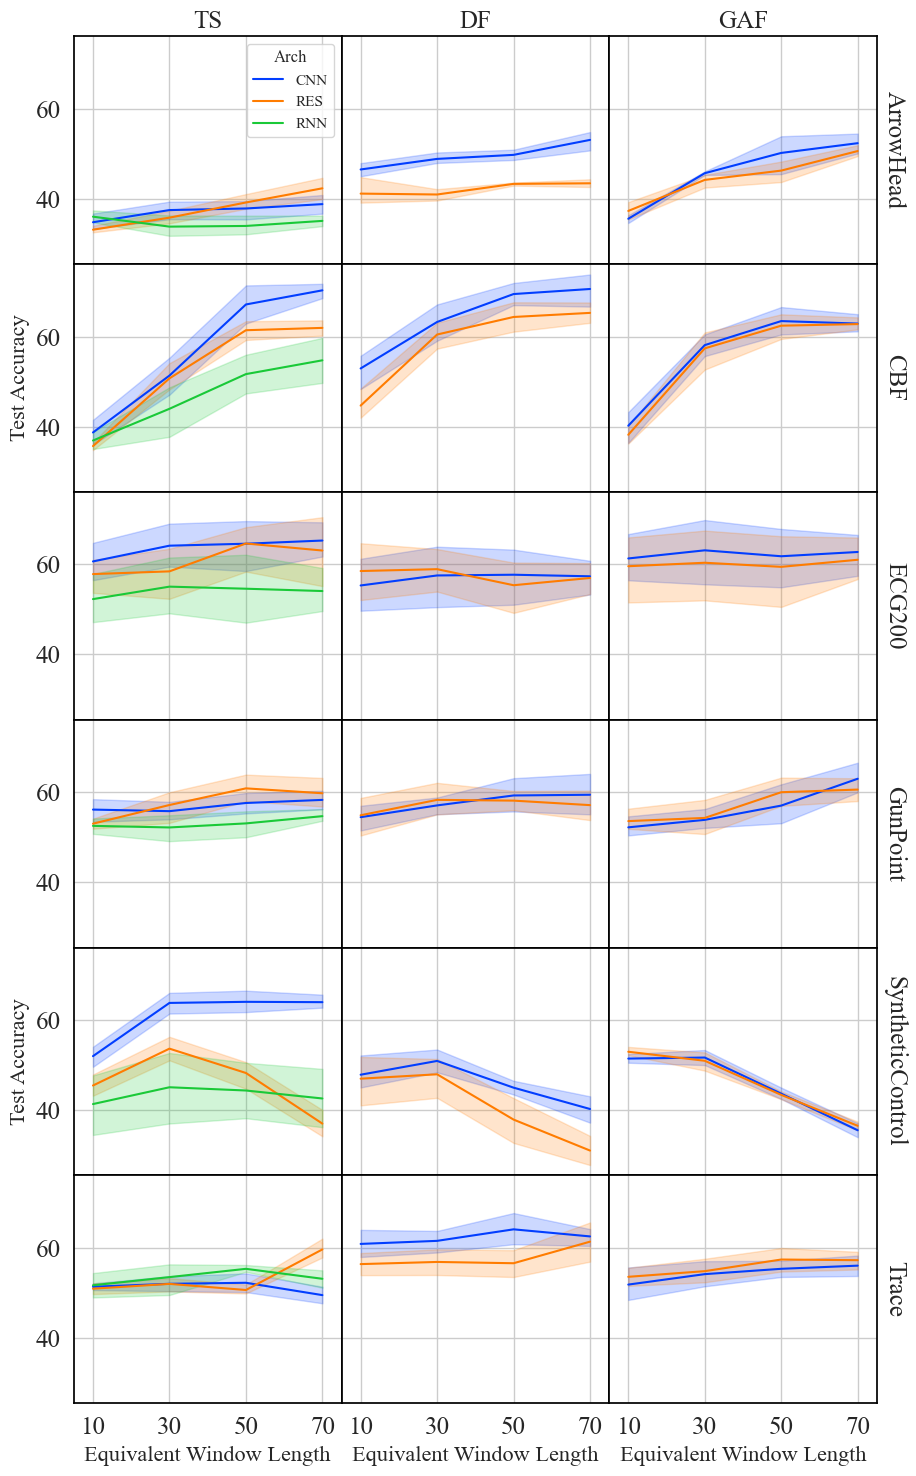

In [3]:
from s3ts.analysis import timedil_figure
timedil_figure(df)

### Self-Supervised Pretrain Figure

In [4]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data["arch"].isin(["cnn", "res"])]
data.sort_values(["dataset","arch"], inplace=True)

In [5]:
data[data["mode"] == "df"].groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

NameError: name 'cols' is not defined

In [149]:
tab1 = data[data["train_exc_limit"] == 32].groupby(["mode", "arch", "pretrained", "stride_series", "dataset"])["test_auroc"].mean()
tab2 = data[data["train_exc_limit"] == 32].groupby(["mode", "arch", "pretrained", "stride_series", "dataset"])["test_auroc"].std()
tab = pd.merge(tab1, tab2, on=["mode", "arch", "pretrained", "stride_series", "dataset"]).rename(columns={"test_auroc_x": "mean", "test_auroc_y": "std"})
tab["mean"], tab["std"] = tab["mean"]*100, tab["std"]*100
tab.head(36)

mean       std
mode arch pretrained stride_series dataset                              
df   cnn  False      False         ArrowHead         15.544820  0.783782
                                   CBF               39.552712  1.752451
                                   ECG200            27.429294  4.019990
                                   GunPoint          28.272808  3.737693
                                   SyntheticControl  31.243320  1.117565
                                   Trace             15.091016  1.702902
          True       False         ArrowHead         16.461580  0.734088
                                   CBF               40.207942  1.618177
                                   ECG200            28.693670  3.690450
                                   GunPoint          28.923200  3.194277
                                   SyntheticControl  31.930827  0.802917
                     True          ArrowHead         16.460784  0.924861
                                   CBF               39.603037  1.653232
                                   ECG200            29.040729  4.556037
                                   GunPoint          29.543545  2.534839
                                   SyntheticControl  32.120047  0.574859
     res  False      False         ArrowHead         14.319725  0.603261
                                   CBF               37.314526  1.897238
                                   ECG200            28.423370  3.878970
                                   GunPoint          25.367244  2.091338
                                   SyntheticControl  28.428813  1.063200
                                   Trace             13.341602  1.643335
          True       False         ArrowHead         15.036958  0.784400
                                   CBF               38.740850  1.868728
                                   ECG200            28.894771  4.248716
                                   GunPoint          26.849621  2.621126
                                   SyntheticControl  31.040145  0.352787
                     True          ArrowHead         15.597082  0.889952
                                   CBF               38.147784  1.419416
                                   ECG200            29.157669  4.570098
                                   GunPoint          28.319757  2.489673
                                   SyntheticControl  31.516471  0.461024
gf   cnn  False      False         ArrowHead         15.801134  1.192387
                                   CBF               35.571803  2.730316
                                   ECG200            29.126933  4.751497
                                   GunPoint          28.118983  3.811791

In [150]:
tab.tail(36)

mean       std
mode arch pretrained stride_series dataset                              
df   res  True       True          CBF               38.147784  1.419416
                                   ECG200            29.157669  4.570098
                                   GunPoint          28.319757  2.489673
                                   SyntheticControl  31.516471  0.461024
gf   cnn  False      False         ArrowHead         15.801134  1.192387
                                   CBF               35.571803  2.730316
                                   ECG200            29.126933  4.751497
                                   GunPoint          28.118983  3.811791
                                   SyntheticControl  29.029021  0.303571
                                   Trace             11.977409  0.601287
          True       False         ArrowHead         16.410452  1.612070
                                   CBF               36.576387  2.266603
                                   ECG200            30.783789  4.261906
                                   GunPoint          31.429405  3.416523
                                   SyntheticControl  29.310411  0.396246
                     True          ArrowHead         16.629333  0.385443
                                   CBF               36.412448  2.264550
                                   ECG200            30.566214  4.678444
                                   GunPoint          29.474193  3.883255
                                   SyntheticControl  29.411012  0.273429
     res  False      False         ArrowHead         16.536463  1.083330
                                   CBF               35.289189  2.518007
                                   ECG200            29.809902  4.324996
                                   GunPoint          27.292699  1.792462
                                   SyntheticControl  29.553351  0.399774
                                   Trace             12.115753  0.627667
          True       False         ArrowHead         16.870160  0.722583
                                   CBF               36.470494  2.309059
                                   ECG200            30.319140  4.688638
                                   GunPoint          29.476945  2.826560
                                   SyntheticControl  29.554668  0.419503
                     True          ArrowHead         15.635641  0.993916
                                   CBF               35.924267  2.612429
                                   ECG200            30.253822  4.722210
                                   GunPoint          29.037445  2.348991
                                   SyntheticControl  29.536381  0.197391

In [151]:
# Scale the data to 0-100 range
data["test_acc"] = data["test_acc"]*100
data["test_auroc"] = data["test_auroc"]*100

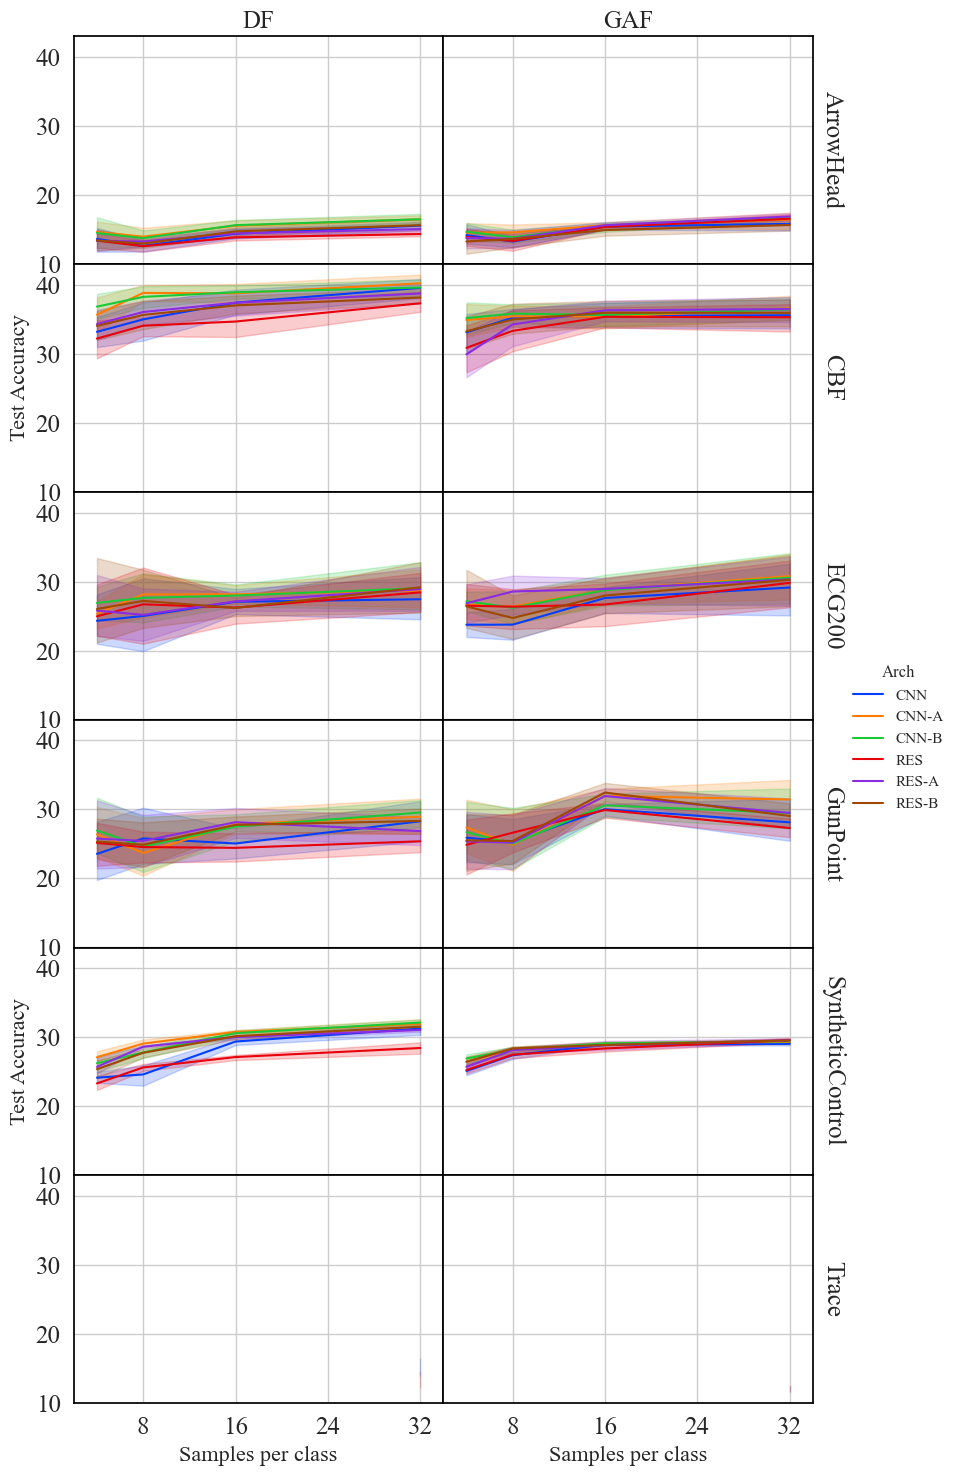

In [153]:
# Generate a plot

data["arch"].replace(to_replace=["cnn", "res"], value=["CNN", "RES"], inplace=True)
data["mode"].replace(to_replace=["df", "gf"], value=["DF", "GAF"], inplace=True)
data["Arch"] = data["arch"] + data["pretrained"].replace({True: "-", False: ""}) + data["stride_series"].replace({True: "B", False: "A"})
data["Arch"].replace({"CNNA": "CNN", "RESA": "RES"}, inplace=True)

fontsize = 18

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times New Roman', size=fontsize)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

g = sns.relplot(data=data, x="train_exc_limit", y="test_auroc", hue='Arch', 
                kind="line", col="mode", row="dataset", palette=sns.color_palette("bright"),
                height=2.5, aspect=1.75, legend="auto", markers="True", 
                col_order=["DF", "GAF"], 
                row_order=["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"],
                facet_kws={"despine": False, "margin_titles": True, "legend_out": True})

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=fontsize)
g.set_xlabels("Samples per class", fontsize=fontsize-2);
g.set_ylabels("Test Accuracy", fontsize=fontsize-2);
g.set(xlim=(2, 34), xticks=[8,16,24,32])
#    ylim=[15, 80], yticks=[20, 30, 40, 50, 60, 70])
g.figure.subplots_adjust(wspace=0, hspace=0)

for (row_val, col_val), ax in g.axes_dict.items():
    if row_val not in ["CBF", "SyntheticControl"]:
        ax.set_ylabel("")
    for sp in ax.spines.values():
        sp.set_color("black")

g.savefig("figures/pretrain.pdf", bbox_inches='tight')

### Dataset Encoding Figures

In [1]:
from s3ts.analysis import encoding_plot

for dset in ["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"]:
    encoding_plot(dset)

/home/raul/code/s3ts/s3ts_env/lib/python3.11/site-packages/sktime/__init__.py:45: PackageDeprecationWarning: 
The sktime PyPI package is deprecated.
The sktime project split into two projects.

To find out how to install the new packages, please go to:

* https://github.com/aeon-toolkit/aeon
* https://github.com/sktime/sktime

Here is what you can do when installing sktime via pip (e.g. using `pip install ...` or a requirement file like `requirements.txt`, `setup.py`, `setup.cfg`):

* continue using the package without receiving any updates (ignoring the deprecation warning or avoiding it by pinning the version: `sktime==0.18.0`),
* replace sktime with one of the new projects,
* if the sktime package is used by one of your dependencies, it would be great if you take some time to track which package uses sktime and report to their issue tracker that sktime is deprecated.

More information is available at:
https://github.com/mloning/sktime-deprecation/discussions/2

If the previous advic

NameError: name 'data' is not defined